# Stock Price Data Analysis - Comcast Corp (YTD 2024)

## Step 1: Data Loading and Cleaning

In [37]:
import pandas as pd

# Load the data
file_path = 'HistoricalData_1730767821606.csv'  # Path to your CSV file
stock_data = pd.read_csv('/Users/kavya/Downloads/GitHub/Datasets/HistoricalData_1730767821606.csv')

# Clean the data
stock_data['Close/Last'] = stock_data['Close/Last'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
stock_data['Open'] = stock_data['Open'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
stock_data['High'] = stock_data['High'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
stock_data['Low'] = stock_data['Low'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Display the first few rows to confirm cleaning
print(stock_data.head())

        Date  Close/Last    Volume    Open   High     Low
0 2024-11-01       43.56  25078460  44.350  44.68  43.490
1 2024-10-31       43.67  35198350  45.205  45.31  42.835
2 2024-10-30       42.24  27530380  41.820  42.47  41.805
3 2024-10-29       42.07  21091460  41.770  42.49  41.735
4 2024-10-28       41.84  19062510  41.620  41.96  41.620


## Step 2: Overall Year Data Analysis

### i) Calculating Descriptive Statistics:
Descriptive statistics provide valuable insights into the stock's performance over the year. 

In this analysis, we will calculate the following key metrics: <br>

- **Mean**: The average closing price. <br>
- **Median**: The middle value of closing prices. <br>
- **Variance**: The measure of how much the closing prices vary. <br>
- **Standard Deviation**: The square root of variance, indicating the average distance from the mean. <br>
- **Range**: The difference between the highest and lowest closing prices.

In [40]:
# Calculate overall statistics
overall_stats = {
    'Average': stock_data['Close/Last'].mean(),
    'Median': stock_data['Close/Last'].median(),
    'Variance': stock_data['Close/Last'].var(),
    'Standard Deviation': stock_data['Close/Last'].std(),
    'Range': stock_data['Close/Last'].max() - stock_data['Close/Last'].min()
}
print(overall_stats)

{'Average': 40.68231132075472, 'Median': 40.254999999999995, 'Variance': 4.23266975096128, 'Standard Deviation': 2.05734531641173, 'Range': 9.829999999999998}


- **Average**: 40.68 indicates the average price at which the stock was traded over the year, indicating overall performance.

- **Median**: This provides insight into the central tendency of the stock prices, unaffected by extreme values.

- **Variance and Standard Deviation**: These statistics measure the volatility of the stock prices. Higher values indicate more variability in stock prices.

- **Range**: This shows the highest and lowest prices, giving you a quick sense of how much the stock price fluctuated.

### ii) Visualizations:

Visualizations are crucial for interpreting the descriptive statistics calculated earlier. They provide a clear and intuitive way to understand the distribution and trends in the stock prices. In this section, we will create three types of visualizations: **a histogram, a box plot, and a run chart.**

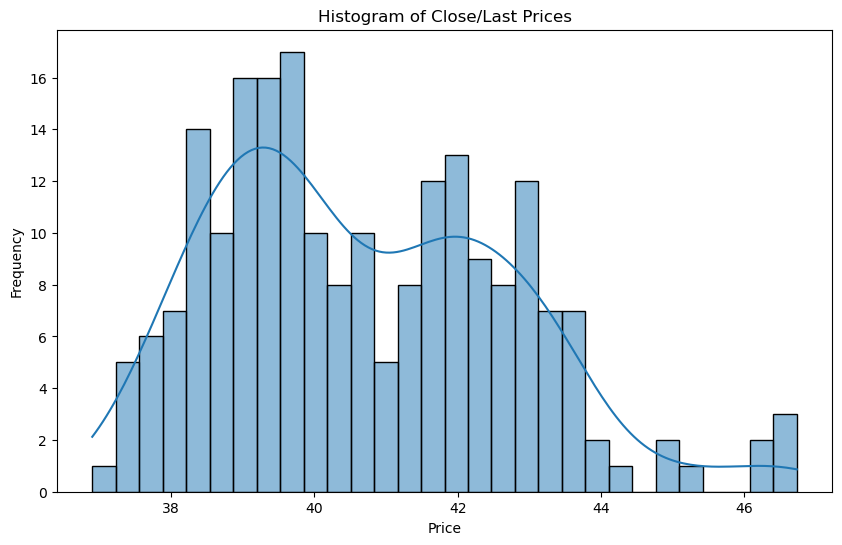

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['Close/Last'], bins=30, kde=True)
plt.title('Histogram of Close/Last Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of the closing prices over the analyzed period. The x-axis represents the range of prices, while the y-axis indicates the frequency of those prices. The overlay of the kernel density estimate (KDE) provides a smoothed curve that helps visualize the distribution's shape.

**Key Observations**:
- Distribution: The histogram for overall year data typically displays a broader distribution of prices, showing how stock prices fluctuate throughout the entire year.
- Shape: It might have multiple peaks (bimodal or multimodal) depending on significant market events, reflecting variations in trading behavior or responses to external factors.
- Spread: The range of prices shown will cover the entire annual period, allowing for potential outliers and indicating moments of high volatility.

The distribution appears to be roughly normal, with most prices clustering around the average. There are some outliers on the higher end of the price spectrum, which may indicate significant price movements or market anomalies.

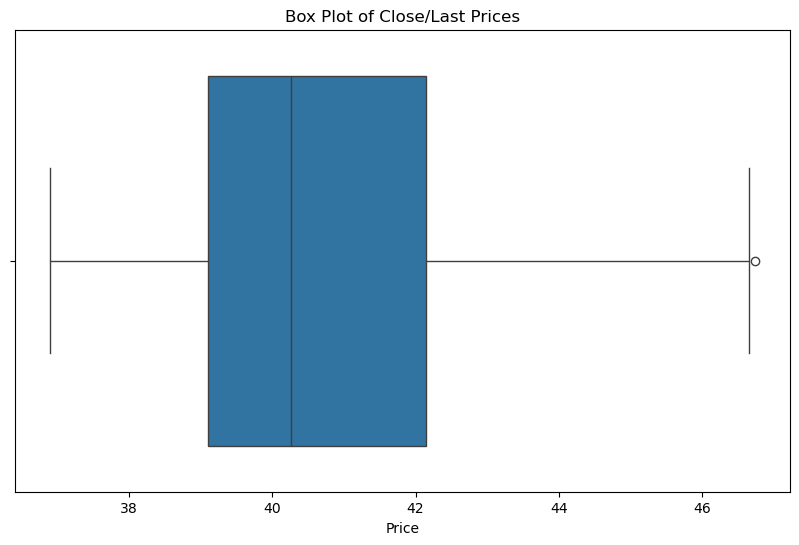

In [45]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=stock_data['Close/Last'])
plt.title('Box Plot of Close/Last Prices')
plt.xlabel('Price')
plt.show()

The box plot provides a visual summary of the closing prices, highlighting the median, quartiles, and potential outliers.

**Key Observations**:

- Median Line: The line within the box represents the median closing price for the entire year. It indicates the central tendency of stock prices over the longer time frame.
- Interquartile Range (IQR): The height of the box represents the interquartile range (IQR), which shows the middle 50% of the data. A wider box indicates greater variability in stock prices throughout the year.
- Whiskers: The lines extending from the box (whiskers) indicate the range of the data. They often extend to the lowest and highest values within 1.5 times the IQR from the lower and upper quartiles. Points outside of this range are considered outliers.
- Outliers: Any points outside the whiskers are plotted individually and represent significant price fluctuations or anomalies that occurred throughout the year.

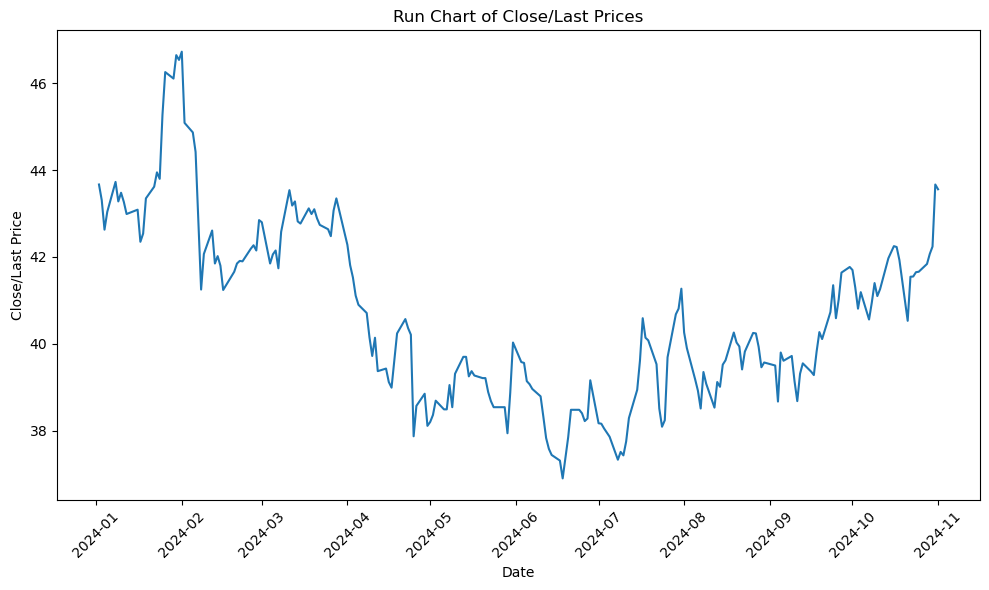

In [47]:
# Run Chart
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close/Last'])
plt.title('Run Chart of Close/Last Prices')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The run chart depicts the trend of closing prices over time. This line graph effectively illustrates how the stock price changes from day to day.

**Key Observations**:

- The run chart shows the fluctuations in closing prices, highlighting periods of significant increase or decrease.
- It helps in identifying trends over time—whether the stock is generally trending upwards, downwards, or remaining stable.
- Notable spikes or drops in the chart could correlate with specific events in the market, such as earnings announcements or economic news.

- Trend Line: The run chart for overall year data plots the daily closing prices over the entire year, showcasing the overall trend of stock performance.
- Fluctuations: It typically displays more fluctuations, capturing the daily volatility of stock prices. Peaks and troughs may be observed, indicating significant market events or reactions to external factors.
- Seasonality: If applicable, the chart may reveal seasonal trends, demonstrating how stock prices respond differently at various times of the year.

### iii) Confidence Intervals:

- **Confidence Interval**: A range that estimates the true mean closing price with a specified level of confidence (usually 95%). <br>

In this analysis, we will calculate the 95% confidence interval for both the mean and variance of the stock prices.


In [50]:
import scipy.stats as stats
import numpy as np

# Calculate confidence intervals
n = len(stock_data['Close/Last'])
mean = stock_data['Close/Last'].mean()
std_dev = stock_data['Close/Last'].std()

# 95% confidence interval for the mean
z = stats.norm.ppf(0.975)  # 1.96 for 95% confidence
conf_interval_mean = (mean - z * (std_dev / np.sqrt(n)), mean + z * (std_dev / np.sqrt(n)))

# 95% confidence interval for the variance
chi2_lower = stats.chi2.ppf(0.025, n-1)
chi2_upper = stats.chi2.ppf(0.975, n-1)
conf_interval_variance = ((n-1) * std_dev**2 / chi2_upper, (n-1) * std_dev**2 / chi2_lower)

print(f'95% CI for Mean: {conf_interval_mean}')
print(f'95% CI for Variance: {conf_interval_variance}')

95% CI for Mean: (40.40537025906371, 40.95925238244573)
95% CI for Variance: (3.5283058277804646, 5.1724470224316015)


**Confidence Interval for Mean**: The 95% confidence interval for the mean closing price is estimated to be between 40.41 and 40.96. This means we can be 95% confident that the true mean closing price for the stock lies within this range.

**Interpretation**: The confidence interval reflects the average stock price performance over the entire year, suggesting moderate stability, though there may be significant fluctuations throughout this period.

**Confidence Interval for Variance**: The confidence interval for the variance indicates the expected variability of the stock prices. The calculated interval provides insights into how much fluctuation can be anticipated based on the data observed.

**Interpretation**: A wider variance indicates that the stock experienced varying levels of volatility throughout the year, suggesting potential risks associated with investment in this stock.

These intervals provide a statistical foundation for understanding the reliability of our estimates for both the mean price and the variance in stock prices, helping investors gauge potential risks and returns.

### iv) Scatter Plot:

A scatter plot helps visualize the relationship between today's closing price and yesterday's closing price, allowing us to assess any correlation between consecutive days' prices.

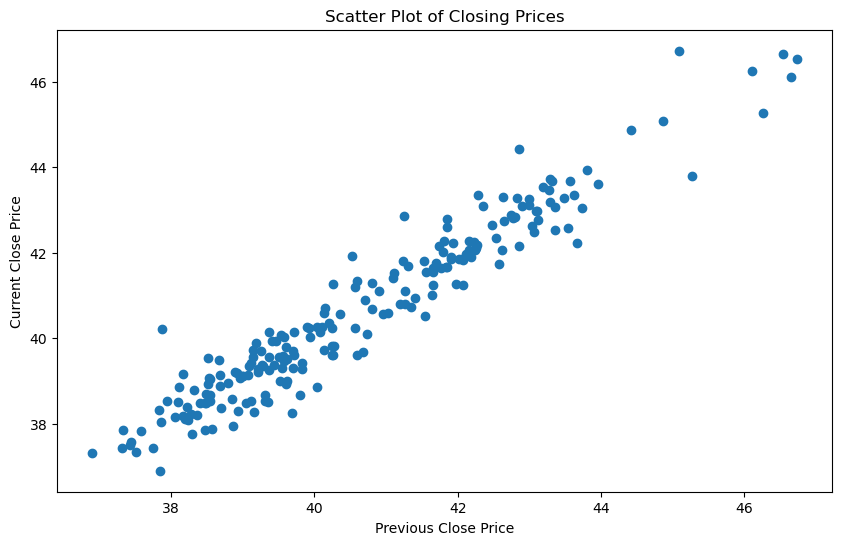

In [53]:
# Create a scatter plot of today's closing price vs. yesterday's closing price
stock_data['Previous Close'] = stock_data['Close/Last'].shift(1)
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Previous Close'][1:], stock_data['Close/Last'][1:])
plt.title('Scatter Plot of Closing Prices')
plt.xlabel('Previous Close Price')
plt.ylabel('Current Close Price')
plt.show()

The scatter plot illustrates how the current closing price relates to the previous day's closing price. Each point represents a day's closing price against its predecessor.

**Key Observations**:

- A positive correlation is evident, as points tend to cluster along a line that slopes upward. This suggests that higher closing prices from the previous day are often followed by higher closing prices the next day.
- The spread of points indicates the degree of variation, with some prices deviating from the trend line, which may reflect market volatility or external factors influencing price movements.

## Step 3: Quarterly Analysis

### i) Filtering Data for Q1 and Q2:

To analyze the stock's performance during the first two quarters of 2024, we filter the data into two subsets:

 - **Q1**: January 1 to March 31
 - **Q2**: April 1 to June 30

In [57]:
# Filter data for Q1 (Jan 1 – Mar 31) and Q2 (Apr 1 – June 30)
q1_data = stock_data[(stock_data['Date'] >= '2024-01-01') & (stock_data['Date'] <= '2024-03-31')]
q2_data = stock_data[(stock_data['Date'] >= '2024-04-01') & (stock_data['Date'] <= '2024-06-30')]

### ii) Calculating Descriptive Statistics for Q1 and Q2:

We are calculating key descriptive statistics for both quarters to summarize their performance. 

The following metrics will be calculated:
- Average
- Median
- Variance
- Standard Deviation
- Range
  
Here’s the function to compute these statistics:

In [59]:
# Function to calculate statistics
def calculate_statistics(data):
    return {
        'Average': data['Close/Last'].mean(),
        'Median': data['Close/Last'].median(),
        'Variance': data['Close/Last'].var(),
        'Standard Deviation': data['Close/Last'].std(),
        'Range': data['Close/Last'].max() - data['Close/Last'].min()
    }

q1_stats = calculate_statistics(q1_data)
q2_stats = calculate_statistics(q2_data)

print('Q1 Stats:', q1_stats)
print('Q2 Stats:', q2_stats)

Q1 Stats: {'Average': 43.1422131147541, 'Median': 42.89, 'Variance': 1.7063437704918025, 'Standard Deviation': 1.3062709406902546, 'Range': 5.489999999999995}
Q2 Stats: {'Average': 39.13238095238097, 'Median': 39.05, 'Variance': 1.162747465437789, 'Standard Deviation': 1.0783076858845944, 'Range': 5.380000000000003}


**Q1 Statistics**:

- Average: 43.14, indicating a relatively high average price in Q1.
- Median: 42.89, suggesting that half of the closing prices were below this value.
- Variance: 1.71, indicating moderate volatility in this period.
- Standard Deviation: 1.31, reflecting the typical distance from the mean price.
- Range: 5.49, demonstrating the fluctuation in prices during Q1.

**Q2 Statistics**:

- Average: 39.13, showing a decline in average price compared to Q1.
- Median: 39.05, indicating a similar trend to the average with prices lower than Q1.
- Variance: 1.16, indicating less volatility than in Q1.
- Standard Deviation: 1.08, suggesting more stability in this quarter.
- Range: 5.38, showing consistent price fluctuations, albeit lower than Q1.
  
This analysis highlights the noticeable decline in average prices from Q1 to Q2, which may require further investigation into external factors influencing market performance.

### iii) Comparative Visualizations:

To visually compare the stock performance between Q1 and Q2, we will create a histogram, box plot, and run chart.

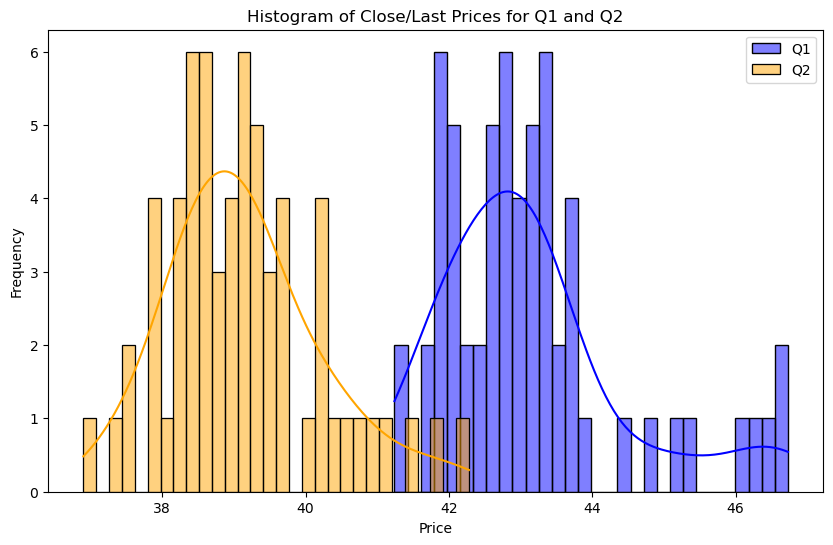

In [62]:
# Histogram for Q1
plt.figure(figsize=(10, 6))
sns.histplot(q1_data['Close/Last'], bins=30, kde=True, color='blue', label='Q1', alpha=0.5)
sns.histplot(q2_data['Close/Last'], bins=30, kde=True, color='orange', label='Q2', alpha=0.5)
plt.title('Histogram of Close/Last Prices for Q1 and Q2')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram visually represents the distribution of closing prices for both quarters, highlighting the shift in averages. Q1 shows a higher concentration of prices around the average compared to Q2.

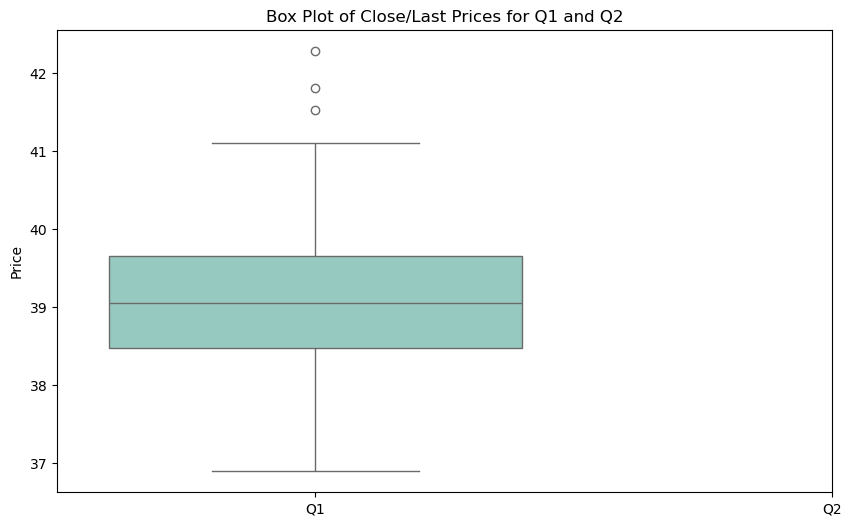

In [64]:
# Box Plot for Q1 and Q2
plt.figure(figsize=(10, 6))
sns.boxplot(data=[q1_data['Close/Last'], q2_data['Close/Last']], palette="Set3")
plt.xticks([0, 1], ['Q1', 'Q2'])
plt.title('Box Plot of Close/Last Prices for Q1 and Q2')
plt.ylabel('Price')
plt.show()

The box plot provides insights into the central tendency and variability of the closing prices. It highlights the differences in the median prices and the presence of outliers between the two quarters.

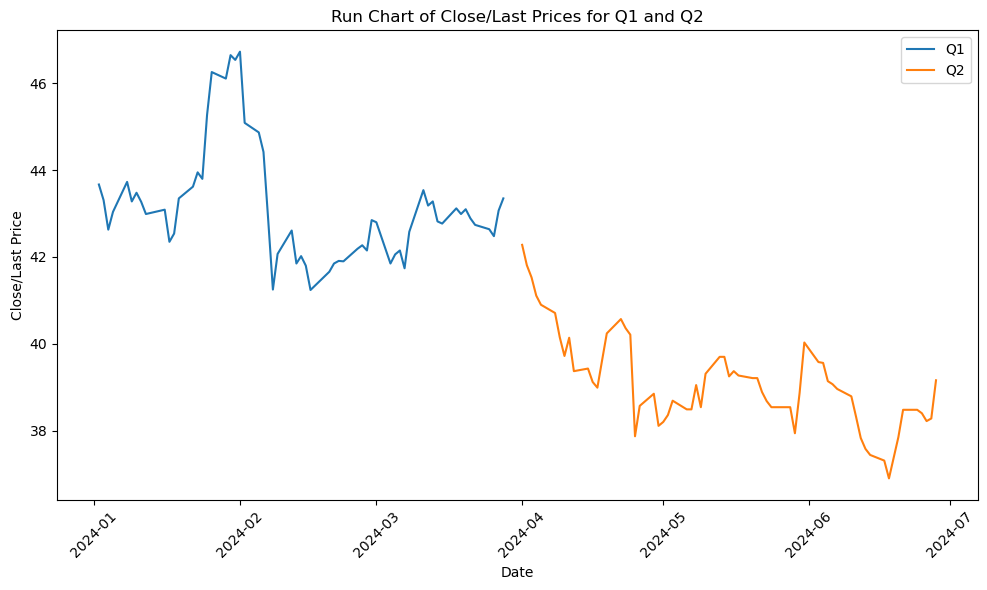

In [66]:
# Run Chart for Q1 and Q2
plt.figure(figsize=(10, 6))
plt.plot(q1_data['Date'], q1_data['Close/Last'], label='Q1')
plt.plot(q2_data['Date'], q2_data['Close/Last'], label='Q2')
plt.title('Run Chart of Close/Last Prices for Q1 and Q2')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The run chart depicts the trend of closing prices over time for both quarters, clearly showing the decline in prices from Q1 to Q2. This visual representation highlights the fluctuations in stock prices on a day-to-day basis. 

### iv) Z-Test for Mean Comparison:

To assess whether the average closing prices in Q1 and Q2 are significantly different from each other, we will conduct a Z-Test. This statistical test evaluates whether the means of two populations (in this case, the two quarters) are different.

In [69]:
# Z-test to check if the means of Q1 and Q2 are significantly different
mean_q1 = q1_data['Close/Last'].mean()
mean_q2 = q2_data['Close/Last'].mean()

std_q1 = q1_data['Close/Last'].std()
std_q2 = q2_data['Close/Last'].std()

# Pooled standard deviation
pooled_std = np.sqrt((std_q1**2 / len(q1_data)) + (std_q2**2 / len(q2_data)))

# Z-score
z_score = (mean_q1 - mean_q2) / pooled_std
print(f'Z-score: {z_score}')

Z-score: 18.609332369363734


**Z-score**: The calculated Z-score (18.61) indicates how many standard deviations the difference between the sample means is from the null hypothesis (which states that there is no difference between the groups).

- A high Z-score suggests a significant difference between the means of the two quarters.
- In general, a Z-score greater than 1.96 or less than -1.96 (for a 95% confidence level) indicates that the means are significantly different.

The results of the Z-Test provide statistical evidence regarding the change in stock prices from Q1 to Q2. A significant Z-score reinforces the findings from the descriptive statistics, confirming that the average price during Q1 was indeed higher than that during Q2.

By combining these quantitative analyses with the visualizations presented earlier, we gain a comprehensive understanding of the stock's performance over the two quarters. The insights gathered from the Z-Test complement the earlier findings, offering a robust framework for decision-making regarding investments in this stock.  

## Step 4: Weekly Data Analysis

### i) Creating Weekly Averages:

To analyze the stock performance on a weekly basis, we will first aggregate the daily closing prices into weekly averages. This process allows us to smooth out daily fluctuations and observe broader trends.

In [73]:
# Resample data to get weekly averages
weekly_data = stock_data.set_index('Date').resample('W').mean().reset_index()

### ii) Calculating Descriptive Statistics for Weekly Data:

Next, we will calculate the descriptive statistics for the weekly averages. The same key metrics will be calculated as before:

- Average
- Median
- Variance
- Standard Deviation
- Range

In [75]:
weekly_stats = calculate_statistics(weekly_data)
print('Weekly Stats:', weekly_stats)

Weekly Stats: {'Average': 40.678613636363636, 'Median': 39.955, 'Variance': 4.084309672832984, 'Standard Deviation': 2.020967509098794, 'Range': 8.589000000000006}


**Average**: 40.68 indicates the mean closing price across the weeks. <br>
**Median**: 39.96 reflects the middle value of weekly closing prices, suggesting a stable price trend. <br>
**Variance**: 4.08 indicates the degree of variation in weekly prices; a higher variance suggests more price fluctuations. <br>
**Standard Deviation**: 2.02 shows how much the weekly averages typically deviate from the mean. <br>
**Range**: 8.59 demonstrates the spread between the highest and lowest weekly averages, giving insight into volatility. <br>

These statistics provide a clear overview of stock performance trends on a weekly basis, which can be useful for assessing **stability and volatility.**

### iii) Visualizations for Weekly Data:

To better understand the weekly data, we will create a histogram, box plot, and run chart. 

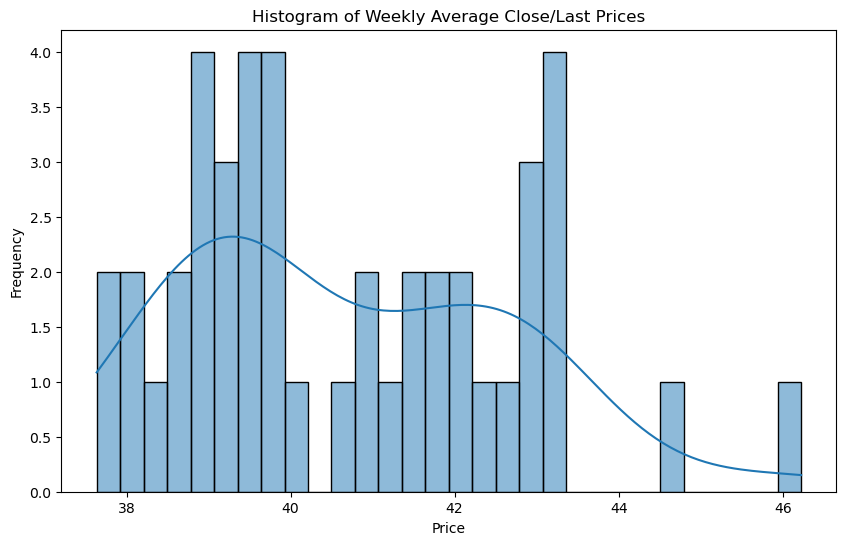

In [78]:
# Histogram for weekly averages
plt.figure(figsize=(10, 6))
sns.histplot(weekly_data['Close/Last'], bins=30, kde=True)
plt.title('Histogram of Weekly Average Close/Last Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of weekly closing prices, indicating where most prices lie. The KDE overlay helps visualize trends and identify potential outliers. 

- Distribution: The histogram for weekly data presents a more condensed view of stock prices over shorter intervals, focusing on average performance each week.
- Shape: It generally appears smoother and may have a more bell-shaped distribution if the stock has stable performance without significant fluctuations in a specific period.
- Spread: The range will be narrower compared to the overall year histogram, showing less variation because extreme prices are averaged out over the weeks.

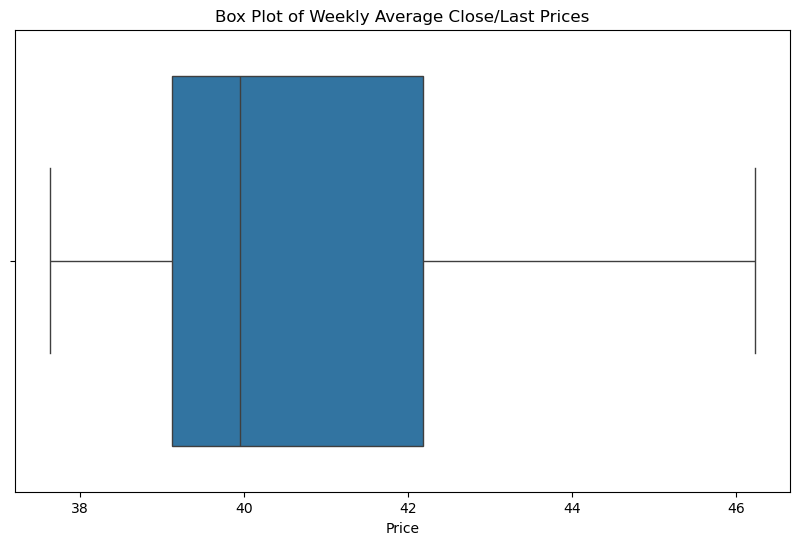

In [80]:
# Box Plot for weekly averages
plt.figure(figsize=(10, 6))
sns.boxplot(x=weekly_data['Close/Last'])
plt.title('Box Plot of Weekly Average Close/Last Prices')
plt.xlabel('Price')
plt.show()

The box plot displays the median, quartiles, and potential outliers in the weekly averages. It visually represents the overall stability of weekly prices and highlights any outlier values. 

- Median Line: Similarly, the median line in the weekly data box plot reflects the central tendency but is based on weekly averages rather than daily prices.
- Interquartile Range (IQR): The IQR for weekly data is expected to be narrower than that of the overall year data if the stock prices are more stable on a weekly basis.
- Whiskers: The whiskers in the weekly box plot may also be shorter, suggesting less variation in weekly closing prices compared to the overall year.
- Outliers: There may be fewer outliers in the weekly box plot, indicating that the averaging process smooths out extreme values that might appear in daily data.

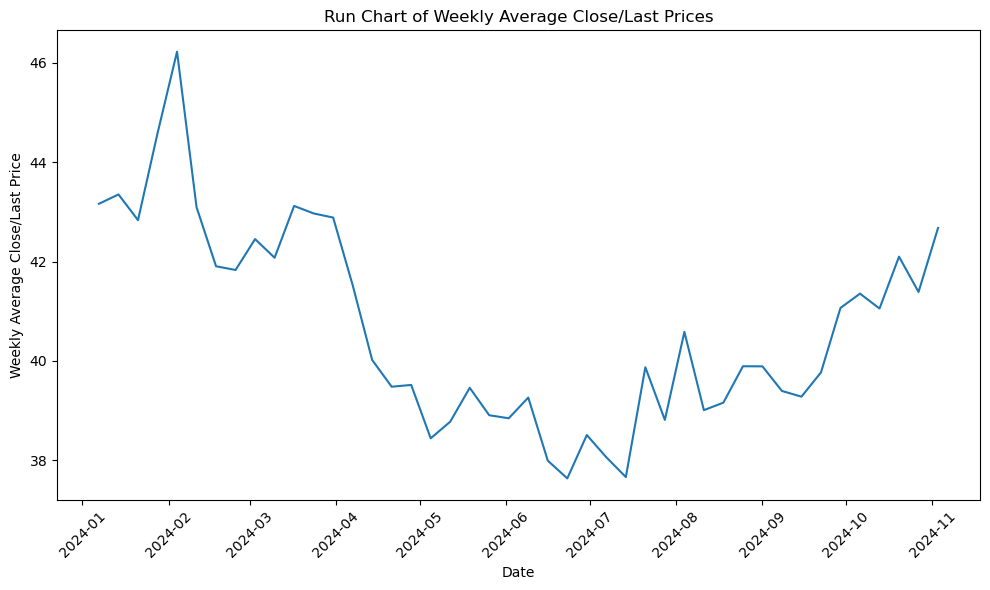

In [82]:
# Run Chart for weekly averages
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Date'], weekly_data['Close/Last'])
plt.title('Run Chart of Weekly Average Close/Last Prices')
plt.xlabel('Date')
plt.ylabel('Weekly Average Close/Last Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The run chart illustrates the trend of weekly average prices over time, highlighting any significant increases or decreases. It allows for observation of fluctuations in stock prices on a week-by-week basis.

- Trend Line: The weekly run chart plots the average closing prices calculated on a weekly basis, providing a smoother representation of stock performance over time.
- Smoothing Effect: Due to the aggregation of daily prices into weekly averages, the weekly run chart often exhibits less volatility and fewer abrupt changes. This smoothing effect makes it easier to observe long-term trends.
- Trend Clarity: The weekly run chart can provide a clearer view of the overall trend without being obscured by daily fluctuations, making it easier to identify patterns in performance.


### iv) Confidence Interval for Weekly Averages:

The confidence interval (CI) provides a range within which we can expect the true mean of the weekly closing prices to fall, based on our sample data. In this analysis, we will calculate the 95% confidence interval for the mean of the weekly averages.

In [85]:
# 95% CI for weekly averages
n_weekly = len(weekly_data['Close/Last'])
mean_weekly = weekly_data['Close/Last'].mean()
std_dev_weekly = weekly_data['Close/Last'].std()

# 95% confidence interval for the mean
conf_interval_mean_weekly = (mean_weekly - z * (std_dev_weekly / np.sqrt(n_weekly)), mean_weekly + z * (std_dev_weekly / np.sqrt(n_weekly)))

print(f'95% CI for Weekly Mean: {conf_interval_mean_weekly}')

95% CI for Weekly Mean: (40.08146687088119, 41.275760401846085)


The calculated confidence interval (40.41, 41.28) indicates that we are 95% confident that the true mean of the weekly closing prices lies within this range.

**Interpretation**: The range suggests that the weekly averages have been relatively consistent, reflecting more stability in short-term performance compared to the longer-term data.

- This range gives investors a sense of stability; if the mean falls within these bounds, it suggests that the weekly averages have been relatively consistent.

- A narrow confidence interval indicates that the sample mean is a precise estimate of the population mean, while a wider interval suggests more variability.

By calculating this confidence interval, we gain a clearer understanding of the uncertainty associated with our estimates, enhancing our ability to make informed decisions based on the stock's performance. 
It highlights the expected stability of stock prices while accounting for variability, offering a comprehensive view for strategic investment decisions.

## Step 5: Key Findings and Interpretations

### i) Overall Year Analysis

The overall analysis revealed:
- An average closing price of **40.68** suggests a stable performance for the stock during the year. <br>
- The median of **40.25** indicates that half of the closing prices were below this value, reflecting a slightly skewed distribution where a portion of the data may be impacted by outlier prices. <br>
- A variance of **4.23** and a standard deviation of **2.06** indicate moderate volatility, meaning the stock prices exhibited some fluctuation throughout the year. <br>
- The 95% confidence interval for the mean (**40.41 to 40.96**) suggests a reliable estimate of the average closing price, while the confidence interval for variance indicates the expected variability of the stock prices.

### ii) Quarterly Analysis

Comparing Q1 and Q2:

- Q1 displayed a significantly higher average closing price of **43.14** compared to Q2's **39.13**, indicating a decline in stock performance in the second quarter. <br> 
- The variance and standard deviation were higher in Q1, signifying that the stock was more volatile during this period, with prices fluctuating more widely. <br>
- The Z-score of **18.61** highlights a statistically significant difference between the mean prices of the two quarters, reinforcing the observation that the stock experienced a downturn in Q2.

### iii) Weekly Data Analysis

In the analysis of weekly averages:

- The average weekly closing price was **40.68**, closely aligned with the overall average for the year, suggesting consistent performance across time periods. <br> 
- The variance of **4.08** and standard deviation of **2.02** again reflect moderate volatility, similar to the overall yearly data. <br>
- The 95% confidence interval for the weekly mean (**40.08 to 41.28**) provides a reliable estimate of the average weekly performance, reinforcing the stability observed in the weekly averages.

### Visualizations:

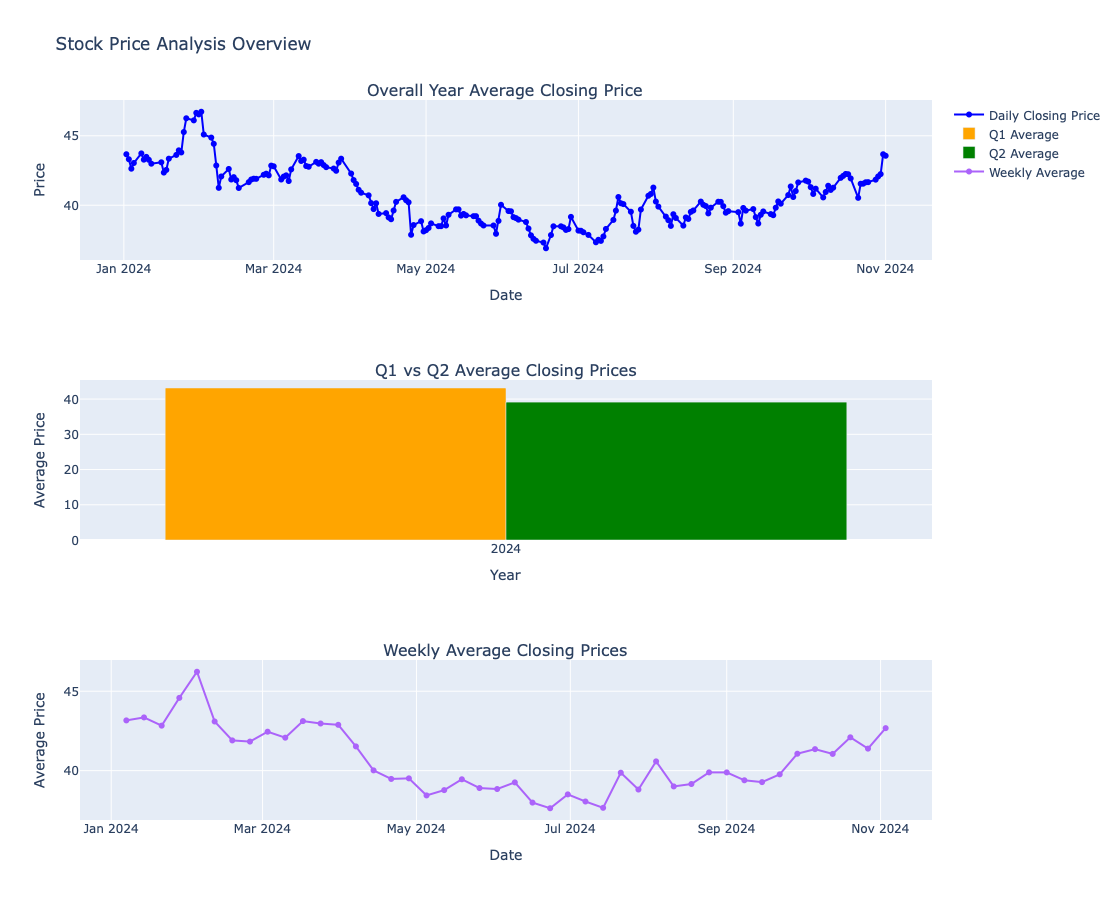

Overall Average Closing Price: $40.68
Median Closing Price: $40.25
Variance of Closing Prices: 4.23
Standard Deviation of Closing Prices: 2.06


In [95]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Load your historical stock price data
data = pd.read_csv('/Users/kavya/Downloads/Masters/Yocket/Finalised docs/ASU/MSBA/Fall term /Q2/Classes/SCM 517 - Business Process Analytics/Individual Assi 1/HistoricalData_1730767821606.csv')
data['Date'] = pd.to_datetime(data['Date'])

# Clean the numeric columns
for col in ['Close/Last', 'Open', 'High', 'Low']:
    # Remove dollar signs and commas, then convert to float
    data[col] = data[col].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Create Year and Quarter columns
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.to_period('Q')

# Calculate overall metrics
overall_avg = data['Close/Last'].mean()
median_price = data['Close/Last'].median()
variance_price = data['Close/Last'].var()
std_dev_price = data['Close/Last'].std()

# Calculate Q1 and Q2 averages
q1_avg = data[data['Date'].dt.month.isin([1, 2, 3])].groupby('Year')['Close/Last'].mean().reset_index()
q2_avg = data[data['Date'].dt.month.isin([4, 5, 6])].groupby('Year')['Close/Last'].mean().reset_index()

# Calculate weekly averages
weekly_avg = data.resample('W', on='Date')['Close/Last'].mean().reset_index()

# Create subplots for visualization
fig = make_subplots(rows=3, cols=1, subplot_titles=(
    'Overall Year Average Closing Price',
    'Q1 vs Q2 Average Closing Prices',
    'Weekly Average Closing Prices'
))

# Overall Year Average Closing Price
fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['Close/Last'],
    mode='lines+markers',
    name='Daily Closing Price',
    hoverinfo='x+y',
    marker=dict(color='blue')
), row=1, col=1)

# Q1 vs Q2 Average Closing Prices
fig.add_trace(go.Bar(
    x=q1_avg['Year'],
    y=q1_avg['Close/Last'],
    name='Q1 Average',
    hoverinfo='x+y',
    marker_color='orange'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=q2_avg['Year'],
    y=q2_avg['Close/Last'],
    name='Q2 Average',
    hoverinfo='x+y',
    marker_color='green'
), row=2, col=1)

# Weekly Average Closing Prices
fig.add_trace(go.Scatter(
    x=weekly_avg['Date'],
    y=weekly_avg['Close/Last'],
    mode='lines+markers',
    name='Weekly Average',
    hoverinfo='x+y'
), row=3, col=1)

# Update layout
fig.update_layout(title='Stock Price Analysis Overview', height=900)
fig.update_xaxes(title_text='Date', row=1, col=1)
fig.update_yaxes(title_text='Price', row=1, col=1)
fig.update_xaxes(title_text='Year', row=2, col=1)
fig.update_yaxes(title_text='Average Price', row=2, col=1)
fig.update_xaxes(title_text='Date', row=3, col=1)
fig.update_yaxes(title_text='Average Price', row=3, col=1)

# Show the figure
fig.show()

# Display key metrics
print(f'Overall Average Closing Price: ${overall_avg:.2f}')
print(f'Median Closing Price: ${median_price:.2f}')
print(f'Variance of Closing Prices: {variance_price:.2f}')
print(f'Standard Deviation of Closing Prices: {std_dev_price:.2f}')

## Comparisons

### 3b. Descriptive Statistics of Weekly Data vs Overall Year Data: 

**1. Mean Consistency**

 - Both the average from the weekly data (40.68) and the overall year data (40.68) are identical. This indicates that the average weekly price is representative of the annual average, suggesting stable performance throughout the year.

**2. Median Comparison**

 - The median for the overall year (40.25) is higher than that for the weekly data (39.96). This suggests that while the weekly averages are generally consistent, there might be more extreme values in the overall year data influencing the median.

**3. Variance and Volatility**

 - The variance for the overall year (4.23) is slightly higher than that for the weekly data (4.08), indicating that while both datasets exhibit volatility, the overall year has a marginally greater degree of price variation.
Standard deviations are also quite similar (2.06 for the year vs. 2.02 for weekly), indicating that the variability in stock prices remains consistent across both analyses.

**4. Range Analysis**

 - The range of the overall year (9.83) is larger than that of the weekly data (8.59), suggesting that the stock prices experienced a wider fluctuation over the entire year compared to individual weeks. This could be indicative of specific events or trends that affected stock prices throughout the year but were not as pronounced in shorter weekly intervals.


### 3c. Histogram of Overall Year Data vs Weekly Data:

**1. Range and Scale**

The overall year histogram will have a wider range, showing both the highest and lowest prices observed throughout the year, while the weekly histogram reflects a smaller range that captures average prices over weeks.

**2. Variability**

The overall year data histogram may highlight instances of extreme values (outliers) which can skew the average and variance, while the weekly histogram focuses on the typical weekly behavior, smoothing out the extremes.

**3. Insights on Stability**

If the weekly histogram shows a tight distribution around the mean, it suggests more consistent pricing over time. In contrast, a wider spread in the overall year histogram may indicate periods of instability or significant price movements that occurred at different times during the year.

**4. Visual Comparison**

Visually, the overall year histogram may have more pronounced peaks and valleys compared to the weekly histogram, which could appear more uniform, indicating the average behavior rather than the individual fluctuations that characterize daily or monthly price movements.

**5. Market Trends**

The overall year histogram can reveal long-term trends and shifts in market sentiment, while the weekly histogram is better suited for observing short-term reactions to market news, earnings reports, or economic changes.

### 3d. Box plot of Overall Year Data vs Weekly Data:

**1. Central Tendency**

The median closing price in the overall year box plot may be different from that of the weekly box plot, potentially indicating that the weekly averages may mask some of the fluctuations seen in daily data over the entire year.

**2. Volatility**

If the overall year data box plot shows a wider IQR compared to the weekly data, it suggests higher volatility and more significant price swings across the year. In contrast, a narrower IQR in the weekly data indicates more consistent pricing with less fluctuation.

**3. Outliers**

The presence of outliers in the overall year box plot may point to specific events or market conditions that caused significant price changes. The weekly box plot, with potentially fewer outliers, indicates more stable performance, with less impact from extreme daily variations.

**4. Comparative Stability**

The weekly box plot should show less variability overall, reflecting the average behavior of stock prices over shorter periods, while the overall year box plot captures a broader range of behaviors, including peaks and troughs in prices.

**5. Market Insights**

The analysis of these box plots provides insights into market behavior; the overall year box plot captures long-term trends and volatility, while the weekly box plot helps investors focus on recent performance and stability.

### 3e. Run Chart of Overall Year Data vs Weekly Data:

**1. Trend Visibility**

The overall year run chart may show a more complex picture with multiple peaks and valleys, reflecting the daily price movements. In contrast, the weekly run chart presents a more straightforward trend line, highlighting the general trajectory of prices without the noise of daily volatility.

**2. Volatility**

The overall year run chart is likely to display more volatility, with sharp increases and decreases that indicate reactions to market news, earnings announcements, or other economic indicators. The weekly chart, by averaging these fluctuations, may show a steadier line, suggesting more stable performance over time.

**3. Seasonal Trends**

If the overall year run chart shows distinct patterns or seasonal trends, these may be less pronounced in the weekly run chart. The weekly averages can obscure short-term spikes or drops that might align with specific events or market shifts.

**4. Investment Insights**

The overall year run chart provides insight into the timing of investments and market reactions throughout the year, which can be crucial for understanding long-term performance. The weekly run chart, however, is useful for monitoring short-term performance and making timely investment decisions based on recent trends.

**5. Comparative Analysis**

By comparing the two run charts, investors can assess how well the average performance aligns with daily movements. Significant discrepancies between the two charts might indicate periods of instability where daily prices diverged significantly from the average trend.


### 3f. Confidence Interval of the mean of Overall Year Data vs Weekly Data:

**1. Mean Confidence Interval Comparison**

The mean confidence interval for the weekly data (40.08 to 41.28) is wider than that of the yearly data (40.41 to 40.96). This indicates that while weekly averages show some variability, they are expected to be more stable and less impacted by extreme fluctuations than the yearly averages.

**2. Variance Insight**

The variance confidence interval for the yearly data (3.5283 to 5.1724) provides insight into how much fluctuation can be anticipated based on a larger data set, reflecting the volatility that can occur throughout the year. In contrast, the weekly data does not provide a variance estimate, but the narrower mean confidence interval suggests that the prices are less volatile on a week-to-week basis.

**3. Precision of Estimates**

A narrower confidence interval for the mean in the weekly data reflects a more precise estimate of the population mean. This indicates that the averages are more reliable for short-term investment strategies compared to the broader and possibly more variable yearly data.

**4. Stability and Variability**

The overall year confidence intervals indicate potential risks, as fluctuations in stock prices are common. The confidence interval for the weekly data suggests a more stable investment environment, where stock prices have remained relatively consistent.

**5. Strategic Decision-Making**

Understanding these confidence intervals allows investors to make more informed decisions. For example, a stable weekly mean might encourage short-term investment strategies, while the broader yearly confidence interval might lead to more cautious long-term investment planning due to the potential for greater variability.

## Conclusion

The analysis illustrates significant insights into the stock's performance:

- There is a noticeable **decline in average prices from Q1 to Q2**, which may warrant further investigation into external factors affecting the stock market during that time. <br> 
- The results suggest that while the stock has a stable average price, **it is subject to fluctuations**, as indicated by the calculated variances and standard deviations. <br>
- Overall, the data provides a comprehensive view of stock performance, allowing for informed decisions regarding investment strategies and risk assessment. <br>

These findings and interpretations can serve as a foundation for making more informed investment decisions or further research into market trends.